In [ ]:
def generate_colab_link(username, repo, branch, notebook_path):
    # Substitui espaços por %20
    notebook_path_encoded = notebook_path.replace(" ", "%20")
    return f"https://colab.research.google.com/github/{username}/{repo}/blob/{branch}/{notebook_path_encoded}"

# Exemplo de uso
username = "gutosantos-github"
repo = "amsaude"
branch = "master"
notebook_path = "/5-projeto_aplicacao/projeto_app_novo.ipynb"

link = generate_colab_link(username, repo, branch, notebook_path)
print(f"<a href='{link}' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>")

<a href='https://colab.research.google.com/github/gutosantos-github/amsaude/blob/master//5-projeto_aplicacao/projeto_app_novo.ipynb' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>


<a href='https://colab.research.google.com/github/gutosantos-github/amsaude/blob/master//5-projeto_aplicacao/projeto_app_novo.ipynb' target='_blank'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Abrir no Google Colab'/></a>


In [ ]:
import pandas as pd
import numpy as np

import missingno as missno
import io, os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
#plt.figure(figsize=(largura, altura))
plt.rcParams["figure.figsize"] = (8, 6)

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif

from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_predict, KFold,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from google.colab import drive


In [ ]:
#Montando o drive para carregar o arquivo
GOOGLE_COLAB = "google.colab" in str(get_ipython())

if GOOGLE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
drive = '/content/drive/MyDrive/2024-2/4 - AM_na_saude/projeto_app/ICUDatasetProcessed/'

In [ ]:
csvs = os.listdir(drive)
csvs

['Attack.csv', 'patientMonitoring.csv', 'environmentMonitoring.csv']

In [ ]:
total_rows=0
for csv in csvs:
    data = pd.read_csv(drive + csv)
    total_rows+=len(data)
    print(f'O arquivo {csv} tem {data.shape[0]} linhas e {data.shape[1]} colunas.')
    print(f'Total esperado de linhas: {total_rows}')

O arquivo Attack.csv tem 80126 linhas e 52 colunas.
Total esperado de linhas: 80126
O arquivo patientMonitoring.csv tem 76810 linhas e 52 colunas.
Total esperado de linhas: 156936
O arquivo environmentMonitoring.csv tem 31758 linhas e 52 colunas.
Total esperado de linhas: 188694


In [ ]:
df1 = pd.read_csv(os.path.join(drive, 'environmentMonitoring.csv'))
df2 = pd.read_csv(os.path.join(drive, 'Attack.csv'))
df3 = pd.read_csv(os.path.join(drive, 'patientMonitoring.csv'))

In [ ]:
# Extrair nomes das colunas de cada DataFrame
colunas_df1 = set(df1.columns)
colunas_df2 = set(df2.columns)
colunas_df3 = set(df3.columns)

# Verificar se os nomes das colunas são os mesmos
if colunas_df1 == colunas_df2 == colunas_df3:
    print("Todos os arquivos têm os mesmos nomes de colunas.")
else:
    print("Os arquivos têm nomes de colunas diferentes.")

    # Mostrar diferenças
    print("Colunas em arquivo1 e não em arquivo2:", colunas_df1 - colunas_df2)
    print("Colunas em arquivo2 e não em arquivo3:", colunas_df2 - colunas_df3)
    print("Colunas em arquivo3 e não em arquivo1:", colunas_df3 - colunas_df1)

Todos os arquivos têm os mesmos nomes de colunas.


# Etapa de Concatenação

In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.shape

(188694, 52)

# Início de Pré-processamento

In [ ]:
print(df.duplicated().sum())

2


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Lista para armazenar nomes das colunas que estão completamente vazias
empty_cols=[]

# Itera sobre cada coluna do dataframe
for col in df.columns:
  if df[col].isnull().all():
    empty_cols.append(col)
    if len(empty_cols == []):
      df.fillna(0, inplace=True)

print(f'Colunas vazias: {empty_cols}')

Colunas vazias: []


In [ ]:
nan_count = df.isna().any(axis=1).sum()
print(f"Número de linhas com pelo menos um NaN: {nan_count}")

Número de linhas com pelo menos um NaN: 0


In [ ]:
# Contar o número de NaN por coluna
nan_count_per_column = df.isna().sum()
print("Número de NaN por coluna:")
print(nan_count_per_column)

Número de NaN por coluna:
frame.time_delta         0
frame.time_relative      0
frame.len                0
ip.src                   0
ip.dst                   0
tcp.srcport              0
tcp.dstport              0
tcp.flags                0
tcp.time_delta           0
tcp.len                  0
tcp.ack                  0
tcp.connection.fin       0
tcp.connection.rst       0
tcp.connection.sack      0
tcp.connection.syn       0
tcp.flags.ack            0
tcp.flags.fin            0
tcp.flags.push           0
tcp.flags.reset          0
tcp.flags.syn            0
tcp.flags.urg            0
tcp.hdr_len              0
tcp.payload              0
tcp.pdu.size             0
tcp.window_size_value    0
tcp.checksum             0
mqtt.clientid            0
mqtt.clientid_len        0
mqtt.conack.flags        0
mqtt.conack.val          0
mqtt.conflag.passwd      0
mqtt.conflag.qos         0
mqtt.conflag.reserved    0
mqtt.conflag.retain      0
mqtt.conflag.willflag    0
mqtt.conflags            0
mq

In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
df = df.loc[:, df.nunique() > 1]

In [ ]:
df.columns

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size', 'tcp.window_size_value',
       'tcp.checksum', 'mqtt.clientid', 'mqtt.clientid_len',
       'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags',
       'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.qos',
       'mqtt.retain', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver', 'ip.ttl',
       'class', 'label'],
      dtype='object')

In [ ]:
len(df.columns)

43

In [ ]:
def unique_vals(df, columns):
  for col_name in columns:
    print(f"Colunas: {col_name}\n{'-'*30}")
    unique_vals = df[col_name].unique()
    len_unique_vals = len(unique_vals)
    value_counts = df[col_name].value_counts()

    print(f'Valores Unicos: {len_unique_vals}\n')
    print(f"Value Counts: {value_counts}\n{'='*40}\n")

columns = df.columns.to_list()
unique_vals(df, columns)

Colunas: frame.time_delta
------------------------------
Valores Unicos: 11904

Value Counts: frame.time_delta
0.000001    14271
0.000000    12088
0.000003     2735
0.000025     2599
0.000024     2567
            ...  
6.886630        1
0.052399        1
0.051140        1
0.043011        1
0.004245        1
Name: count, Length: 11904, dtype: int64

Colunas: frame.time_relative
------------------------------
Valores Unicos: 176587

Value Counts: frame.time_relative
0.000000       8
36.572407      6
31.547406      6
40.406267      6
11.132515      6
              ..
21.247532      1
21.247564      1
21.265037      1
21.265987      1
6611.038212    1
Name: count, Length: 176587, dtype: int64

Colunas: frame.len
------------------------------
Valores Unicos: 633

Value Counts: frame.len
80      24622
54      18851
78      18603
86      17470
77      16885
        ...  
1226        1
1234        1
1108        1
1407        1
1120        1
Name: count, Length: 633, dtype: int64

Colunas: ip.

In [ ]:
categ_feat = df.select_dtypes(include=['object']).columns
unique_vals(df, categ_feat)

Colunas: ip.src
------------------------------
Valores Unicos: 44

Value Counts: ip.src
192.168.1.90    46208
192.168.1.91    24714
10.5.126.147    10596
10.5.126.145    10596
10.5.126.148    10518
10.5.126.146    10518
10.5.126.167     6858
10.5.126.165     6858
10.5.126.168     6782
10.5.126.166     6780
10.5.126.84      6084
10.16.120.44     5114
10.5.126.56      4544
10.16.120.72     4088
10.5.150.109     3222
10.5.150.157     1436
10.5.150.152     1436
10.5.150.156     1436
10.5.126.136     1356
10.5.126.137     1356
10.5.126.157     1356
10.5.126.132     1356
10.5.126.156     1356
10.5.126.152     1356
10.5.126.151      840
10.5.126.153      840
10.5.126.155      840
10.5.126.135      840
10.5.126.131      840
10.5.126.154      840
10.5.126.133      840
10.5.126.134      840
10.5.150.155      822
10.5.150.153      822
10.5.150.154      822
10.5.150.151      822
10.5.126.144      416
10.5.126.143      416
10.5.126.141      416
10.5.126.142      416
10.5.126.161      274
10.5.126.1

In [ ]:
list_feat=[]
for feats in categ_feat:
  list_feat.append(feats)
  len_feat = len(list_feat)

print(f'Atributos categóricos: {list_feat}\n')
print(f'Tamanho: {len_feat}')

Atributos categóricos: ['ip.src', 'ip.dst', 'tcp.flags', 'tcp.payload', 'tcp.checksum', 'mqtt.clientid', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.msg', 'mqtt.topic', 'class']

Tamanho: 12


In [ ]:
numeric_feats = df.select_dtypes(include=['float64', 'int64']).columns
unique_vals(df, numeric_feats)

Colunas: frame.time_delta
------------------------------
Valores Unicos: 11904

Value Counts: frame.time_delta
0.000001    14271
0.000000    12088
0.000003     2735
0.000025     2599
0.000024     2567
            ...  
6.886630        1
0.052399        1
0.051140        1
0.043011        1
0.004245        1
Name: count, Length: 11904, dtype: int64

Colunas: frame.time_relative
------------------------------
Valores Unicos: 176587

Value Counts: frame.time_relative
0.000000       8
36.572407      6
31.547406      6
40.406267      6
11.132515      6
              ..
21.247532      1
21.247564      1
21.265037      1
21.265987      1
6611.038212    1
Name: count, Length: 176587, dtype: int64

Colunas: frame.len
------------------------------
Valores Unicos: 633

Value Counts: frame.len
80      24622
54      18851
78      18603
86      17470
77      16885
        ...  
1226        1
1234        1
1108        1
1407        1
1120        1
Name: count, Length: 633, dtype: int64

Colunas: tcp

In [ ]:
list_feat_num=[]
for feats in numeric_feats:
  list_feat_num.append(feats)
  len_feat_num = len(list_feat_num)

print(f'Atributos numéricos: {list_feat_num}\n')
print(f'Tamanho: {len_feat_num}')

Atributos numéricos: ['frame.time_delta', 'frame.time_relative', 'frame.len', 'tcp.srcport', 'tcp.dstport', 'tcp.time_delta', 'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.hdr_len', 'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.clientid_len', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic_len', 'mqtt.ver', 'ip.ttl', 'label']

Tamanho: 31


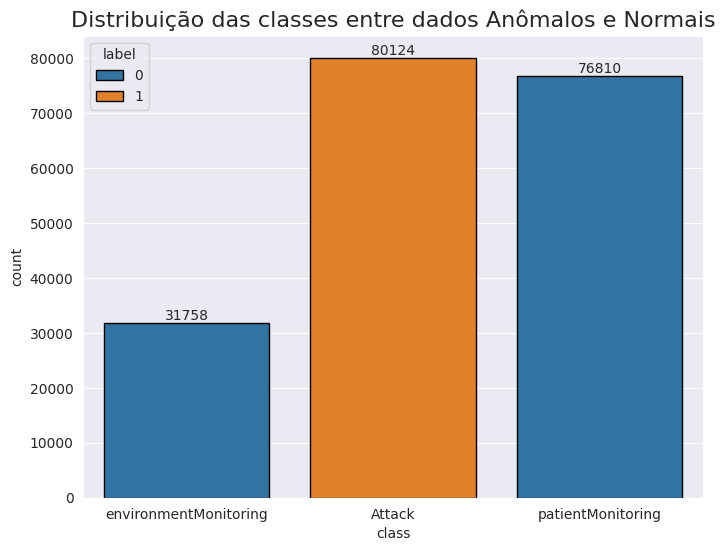

In [ ]:
sns.set_style("darkgrid")
ax = sns.countplot(
    data=df,
    x='class',
    hue='label',
    edgecolor='black')

ax.set_title('Distribuição das classes entre dados Anômalos e Normais',
         fontdict={'fontsize':16})

for container in ax.containers:
  ax.bar_label(container)

In [ ]:
df_label_count = df.groupby('label').size().reset_index(name='count')
df_label_count.columns = ['label', 'count']

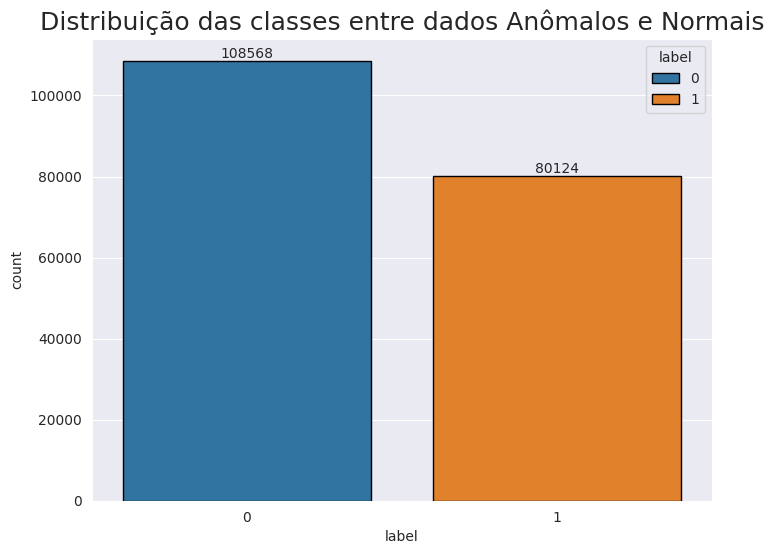

In [ ]:
ax = sns.barplot(
    data = df_label_count,
    x= 'label',
    y= 'count',
    hue= 'label',
    edgecolor='black')

ax.set_title('Distribuição das classes entre dados Anômalos e Normais',
          fontdict={'fontsize':18})

for container in ax.containers:
   ax.bar_label(container)

In [ ]:
count_val0 = df_label_count[df_label_count['label'] == 0]['count'].iloc[0]
count_val1 = df_label_count[df_label_count['label'] == 1]['count'].iloc[0]

print(f'Proporção de Classes:\n')
print(f'Instâncias normais: {count_val0/len(df)*100:.2f}%')
print(f'Instâncias anômalas: {count_val1/len(df)*100:.2f}%')

Proporção de Classes:

Instâncias normais: 57.54%
Instâncias anômalas: 42.46%


#'mqtt.hdrflags' precisa ser convertido para float pois é hexadecimal


In [ ]:
df['mqtt.hdrflags'].unique()

array(['0x00000010', '0x00000020', '0x00000030', '0x00000032',
       '0x00000040', '0x000000c0', '0x000000d0', '0', '0x000000e0',
       '0x0000003a', '0x00000082', '0x00000090', '0x00000031',
       '0x00000050'], dtype=object)

In [ ]:
df['mqtt.hdrflags'] = df['mqtt.hdrflags'].apply(lambda f: float(int(f, 16)))

In [ ]:
df['mqtt.hdrflags'].unique()

array([ 16.,  32.,  48.,  50.,  64., 192., 208.,   0., 224.,  58., 130.,
       144.,  49.,  80.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188692 entries, 0 to 188693
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       188692 non-null  float64
 1   frame.time_relative    188692 non-null  float64
 2   frame.len              188692 non-null  int64  
 3   ip.src                 188692 non-null  object 
 4   ip.dst                 188692 non-null  object 
 5   tcp.srcport            188692 non-null  int64  
 6   tcp.dstport            188692 non-null  int64  
 7   tcp.flags              188692 non-null  object 
 8   tcp.time_delta         188692 non-null  float64
 9   tcp.len                188692 non-null  int64  
 10  tcp.ack                188692 non-null  int64  
 11  tcp.connection.fin     188692 non-null  float64
 12  tcp.connection.rst     188692 non-null  float64
 13  tcp.connection.sack    188692 non-null  float64
 14  tcp.connection.syn     188692 non-null  f

In [ ]:
best_features = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'label']

In [ ]:
# best_features = ['mqtt.hdrflags', 'frame.time_relative', 'tcp.time_delta', 'tcp.flags.push', 'tcp.hdr_len', 'tcp.pdu.size', 'tcp.window_size_value',
#                   'mqtt.kalive', 'mqtt.len', 'mqtt.msgtype', 'mqtt.topic_len', 'mqtt.ver', 'ip.ttl','tcp.flags.ack', 'tcp.flags.syn', 'label']

In [ ]:
df = df[best_features]


In [ ]:
df['mqtt.hdrflags'].unique()

array([ 16.,  32.,  48.,  50.,  64., 192., 208.,   0., 224.,  58., 130.,
       144.,  49.,  80.])

In [ ]:
df.head(10)

,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver,label
0,0.000000,0.000000,1,1,0,16.0,1.0,0.0,0.0,4.0,0
1,0.000053,0.000053,1,1,0,32.0,2.0,0.0,0.0,0.0,0
2,0.000043,0.000000,1,1,0,16.0,1.0,0.0,0.0,4.0,0
3,0.000020,0.000020,1,1,0,32.0,2.0,0.0,0.0,0.0,0
4,0.000016,0.000000,1,1,0,16.0,1.0,0.0,0.0,4.0,0
5,0.000018,0.000018,1,1,0,32.0,2.0,0.0,0.0,0.0,0
6,0.000016,0.000000,1,1,0,16.0,1.0,0.0,0.0,4.0,0
7,0.000015,0.000015,1,1,0,32.0,2.0,0.0,0.0,0.0,0
8,0.000015,0.000000,1,1,0,16.0,1.0,0.0,0.0,4.0,0
9,0.000015,0.000015,1,1,0,32.0,2.0,0.0,0.0,0.0,0


In [ ]:
df['label'].unique()

array([0, 1])

#Converter object para flot

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188692 entries, 0 to 188693
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   frame.time_delta  188692 non-null  float64
 1   tcp.time_delta    188692 non-null  float64
 2   tcp.flags.ack     188692 non-null  int64  
 3   tcp.flags.push    188692 non-null  int64  
 4   tcp.flags.reset   188692 non-null  int64  
 5   mqtt.hdrflags     188692 non-null  float64
 6   mqtt.msgtype      188692 non-null  float64
 7   mqtt.qos          188692 non-null  float64
 8   mqtt.retain       188692 non-null  float64
 9   mqtt.ver          188692 non-null  float64
 10  label             188692 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 17.3 MB


#Utilizado na implementação de mestrado

In [ ]:
# Dividir em chunks
chunk_size = 47173  # Número de linhas por chunk
for i, chunk in enumerate(range(0, len(df), chunk_size)):
    df.iloc[chunk:chunk+chunk_size].to_csv(f"/content/drive/MyDrive/Mestrado/ids_datasets/Malicious/ids_ckunks/ids_{i}.csv", index=False)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
frame.time_delta,188692.0,0.077847,0.400778,0.0,0.000012,0.000042,0.000143,44.436313
tcp.time_delta,188692.0,1.870451,6.482913,0.0,0.000033,0.504431,2.000981,60.037328
tcp.flags.ack,188692.0,0.981276,0.135548,0.0,1.000000,1.000000,1.000000,1.000000
tcp.flags.push,188692.0,0.789382,0.407749,0.0,1.000000,1.000000,1.000000,1.000000
tcp.flags.reset,188692.0,0.008654,0.092625,0.0,0.000000,0.000000,0.000000,1.000000
mqtt.hdrflags,188692.0,51.920760,43.109911,0.0,48.000000,48.000000,50.000000,224.000000
mqtt.msgtype,188692.0,3.208302,2.694764,0.0,3.000000,3.000000,3.000000,14.000000
mqtt.qos,188692.0,0.172768,0.378048,0.0,0.000000,0.000000,0.000000,1.000000
mqtt.retain,188692.0,0.000636,0.025210,0.0,0.000000,0.000000,0.000000,1.000000
mqtt.ver,188692.0,0.041825,0.406879,0.0,0.000000,0.000000,0.000000,4.000000


#A partir daqui o dataset segue com one-hot


In [ ]:
df_corr = df

In [ ]:
corr_matrix = df_corr.corr()

In [ ]:
# corr_matrix

,frame.time_delta,frame.time_relative,frame.len,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,...,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,ip.ttl,label
frame.time_delta,1.000000,0.084561,-0.050260,0.038235,-0.052725,-0.056634,-0.018219,-0.017944,-0.019690,0.007793,...,-0.031341,-0.014283,-0.064337,-0.003120,-0.003258,-0.004804,-0.066396,-0.019741,-0.070654,-0.155114
frame.time_relative,0.084561,1.000000,-0.193739,0.176959,-0.203208,-0.214635,-0.062699,-0.062223,-0.073101,-0.073101,...,0.049803,-0.055995,-0.252745,0.247235,-0.281589,-0.016964,-0.218143,-0.074170,-0.283767,-0.632077
frame.len,-0.050260,-0.193739,1.000000,-0.076980,0.999825,-0.062829,-0.028981,-0.031460,-0.029304,-0.027549,...,0.128448,-0.021454,0.690050,-0.015736,0.592900,0.036201,0.690068,-0.024804,-0.102461,0.303510
tcp.time_delta,0.038235,0.176959,-0.076980,1.000000,-0.080647,-0.084730,-0.027084,-0.026945,-0.029396,-0.029414,...,0.239444,-0.021243,-0.108177,0.362708,-0.080778,-0.007272,-0.102146,-0.029654,-0.111458,-0.245813
tcp.len,-0.052725,-0.203208,0.999825,-0.080647,1.000000,-0.055255,-0.027055,-0.028669,-0.031281,-0.031281,...,0.127630,-0.021941,0.694663,-0.020438,0.596359,0.036607,0.694012,-0.023989,-0.093214,0.318520
tcp.ack,-0.056634,-0.214635,-0.062829,-0.084730,-0.055255,1.000000,-0.027191,-0.027531,-0.030039,-0.030040,...,0.251215,-0.021699,-0.113787,0.051405,-0.113055,-0.007429,-0.137532,-0.030289,0.713544,0.338443
tcp.connection.fin,-0.018219,-0.062699,-0.028981,-0.027084,-0.027055,-0.027191,1.000000,-0.008778,-0.009578,-0.009578,...,-0.085150,-0.006919,-0.037894,-0.065103,-0.042936,-0.002370,-0.039761,-0.009658,0.102007,0.109364
tcp.connection.rst,-0.017944,-0.062223,-0.031460,-0.026945,-0.028669,-0.027531,-0.008778,1.000000,-0.009525,-0.009525,...,-0.128270,-0.006881,-0.046656,-0.111240,-0.042699,-0.002357,-0.051403,-0.009604,-0.036273,0.108761
tcp.connection.sack,-0.019690,-0.073101,-0.029304,-0.029396,-0.031281,-0.030039,-0.009578,-0.009525,1.000000,-0.010394,...,-0.139960,-0.007508,-0.050908,-0.121377,-0.046591,-0.002572,-0.056087,-0.010480,0.103184,0.118673
tcp.connection.syn,0.007793,-0.073101,-0.027549,-0.029414,-0.031281,-0.030040,-0.009578,-0.009525,-0.010394,1.000000,...,-0.139960,-0.007508,-0.050908,-0.121377,-0.046591,-0.002572,-0.056087,-0.010480,-0.039579,0.118673


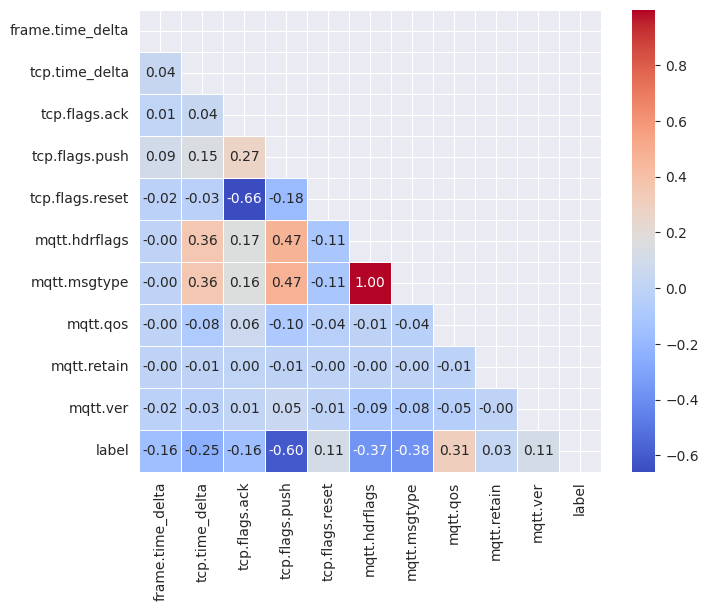

In [ ]:
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            linewidth=.5,
            fmt="0.2f",
            cmap='coolwarm',
            square=True)
plt.show()

# Divisão dos dados em Variáveis Dependentes e Independentes

In [ ]:
#Preparando variáveis dependentes
y = df['label']
y.shape

(188692,)

In [ ]:
#Preparando variáveis independentes
X = df.drop('label', axis = 1)
X.shape

(188692, 10)

#Etapa de Padronização


In [ ]:
scale = StandardScaler()

In [ ]:
scale.fit(X)
X_scaled = scale.transform(X)

In [ ]:
X_scale_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scale_df

,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver
0,-0.194240,-0.288521,0.138134,0.516541,-0.093434,-0.833239,-0.819481,-0.457002,-0.025226,9.728160
1,-0.194108,-0.288513,0.138134,0.516541,-0.093434,-0.462094,-0.448390,-0.457002,-0.025226,-0.102794
2,-0.194133,-0.288521,0.138134,0.516541,-0.093434,-0.833239,-0.819481,-0.457002,-0.025226,9.728160
3,-0.194190,-0.288518,0.138134,0.516541,-0.093434,-0.462094,-0.448390,-0.457002,-0.025226,-0.102794
4,-0.194200,-0.288521,0.138134,0.516541,-0.093434,-0.833239,-0.819481,-0.457002,-0.025226,9.728160
...,...,...,...,...,...,...,...,...,...,...
188687,-0.193751,0.018342,0.138134,0.516541,-0.093434,-0.090948,-0.077299,-0.457002,-0.025226,-0.102794
188688,-0.193811,0.018338,0.138134,0.516541,-0.093434,-0.090948,-0.077299,-0.457002,-0.025226,-0.102794
188689,-0.193926,0.018338,0.138134,0.516541,-0.093434,-0.090948,-0.077299,-0.457002,-0.025226,-0.102794
188690,-0.193876,0.018319,0.138134,0.516541,-0.093434,-0.090948,-0.077299,-0.457002,-0.025226,-0.102794


# Etapa de feature_importances do Random Forest (Somente Benchmarking)

#Divisão dos dados em Treinamento e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale_df,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
print('Tamanho de cada uma das amostras:')
print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')
print(f'y_train:  {y_train.shape}')
print(f'y_test: {y_test.shape}')

Tamanho de cada uma das amostras:
X_train: (132084, 10)
X_test:  (56608, 10)
y_train:  (132084,)
y_test: (56608,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)

print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)

print('--------Applying LogisticRegression Classifier ----------')
LogR = LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)

print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------
--------Applying DecisionTree Classifier ----------


In [ ]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction)*100,
                recall_score(y_test,  LogR_prediction)*100,
                f1_score(y_test,  LogR_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 79.43400226116451, 99.6642685851319, 51.80322419810537, 68.17212532123133), ('KNN ', 99.6148954211419, 99.60482529118137, 99.48894798072129, 99.5468529142762), ('RF ', 99.69262295081968, 99.79161457030924, 99.4847930862556, 99.63796762515085), ('AB ', 99.17856133408705, 99.24884196469557, 98.81585507728103, 99.03187524723616), ('LogR ', 95.28511871113623, 90.46250425443407, 99.38923051354496, 94.71600245491081), ('DT ', 99.64669304691917, 99.76647206005003, 99.401695196942, 99.58374958374958)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0          1          2          3          4
0          LR                                            
1  Classifier   Accurary  Precision     Recall   F1-Score
2         NB   79.434002  99.664269  51.803224  68.172125
3        KNN   99.6148